In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# Let's import the dataset

url = 'https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Final%20Dataset.csv'
df = pd.read_csv(url, header = 0, sep =',',parse_dates=['Date'])

In [3]:
df.head()

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),...,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below
0,2017-03-01,2017,3,2017-03,1,Wednesday,False,13.1,-1.9,5.6,...,243965,115524,41759,65258,709669,1538388,False,1.684403e+06,1.885102e+06,1.483705e+06
1,2017-03-02,2017,3,2017-03,2,Thursday,False,-1.3,-6.4,-3.9,...,251245,115976,41975,64723,710233,1550282,False,1.667167e+06,1.877280e+06,1.457055e+06
2,2017-03-03,2017,3,2017-03,3,Friday,False,-4.3,-8.1,-6.2,...,233488,104386,38029,58671,645929,1413668,False,1.513443e+06,1.722796e+06,1.304090e+06
3,2017-03-04,2017,3,2017-03,4,Saturday,False,-6.5,-11.9,-9.2,...,87326,1518,0,1792,102982,262464,False,3.363528e+05,5.477078e+05,1.249978e+05
4,2017-03-05,2017,3,2017-03,5,Sunday,False,-0.4,-10.6,-5.5,...,62331,1234,0,1135,62998,171582,False,2.407631e+05,3.932424e+05,8.828385e+04


In [4]:
# Convert weekdays into integers

weekday = {'Monday':1 , 'Tuesday':2 , 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
df.Weekday = [weekday[item] for item in df.Weekday]
df.head()

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),...,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below
0,2017-03-01,2017,3,2017-03,1,3,False,13.1,-1.9,5.6,...,243965,115524,41759,65258,709669,1538388,False,1.684403e+06,1.885102e+06,1.483705e+06
1,2017-03-02,2017,3,2017-03,2,4,False,-1.3,-6.4,-3.9,...,251245,115976,41975,64723,710233,1550282,False,1.667167e+06,1.877280e+06,1.457055e+06
2,2017-03-03,2017,3,2017-03,3,5,False,-4.3,-8.1,-6.2,...,233488,104386,38029,58671,645929,1413668,False,1.513443e+06,1.722796e+06,1.304090e+06
3,2017-03-04,2017,3,2017-03,4,6,False,-6.5,-11.9,-9.2,...,87326,1518,0,1792,102982,262464,False,3.363528e+05,5.477078e+05,1.249978e+05
4,2017-03-05,2017,3,2017-03,5,7,False,-0.4,-10.6,-5.5,...,62331,1234,0,1135,62998,171582,False,2.407631e+05,3.932424e+05,8.828385e+04


In [5]:
# Let's create a new dataset to only select the month of January

jan_df = df[(df.Month == 1)& (df.Year != 2017)]
jan_df.head(2)

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),...,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below
306,2018-01-01,2018,1,2018-01,1,1,True,-7.9,-18.6,-13.3,...,47203,700,0,954,64691,151055,True,NaN,NaN,NaN
307,2018-01-02,2018,1,2018-01,2,2,False,-7.1,-12.5,-9.8,...,186825,89191,32313,51693,551372,1195970,True,NaN,NaN,NaN


Let's plot our data points on a graph to eyeball our dataset. We will take a look specifically at Union Station, a central station in Toronto.

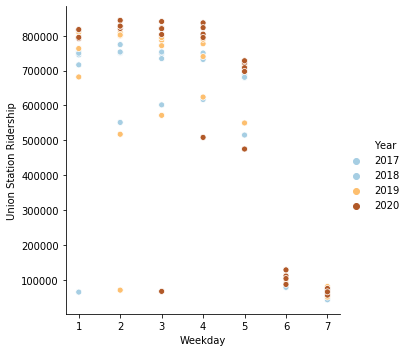

In [6]:
sns.relplot(x='Weekday',y='Union Station Ridership', data=jan_df,hue='Year',palette='Paired')

We notice one outliner by year where there is very little Riderships: the 1st of January.

Let's check our average Riderships for Union Station. 

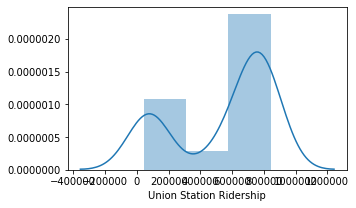

In [7]:
plt.figure(figsize=(5,3))
plt.tight_layout()
sns.distplot(jan_df['Union Station Ridership'])

In [8]:
# Now let's divide the data into attributes ('Weekday') and labels ('Union Station Riderships').

X=jan_df['Weekday'].values.reshape(-1,1)
y=jan_df['Union Station Ridership'].values.reshape(-1,1)

In [9]:
#Split the data to 20% of the data to test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Train the algorithm

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[985859.3182057]
[[-113608.43190178]]


In [12]:
y_pred = regressor.predict(X_test)

In [13]:
# Let's use our test data and see how accurately our algorithm predicts the percentage score.

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}).round()
df

,Actual,Predicted
0,601694,645034.0
1,772849,645034.0
2,716820,417817.0
3,753435,645034.0
4,71131,190600.0
5,681773,872251.0
6,740309,531426.0
7,809108,758642.0
8,624124,531426.0
9,836998,531426.0


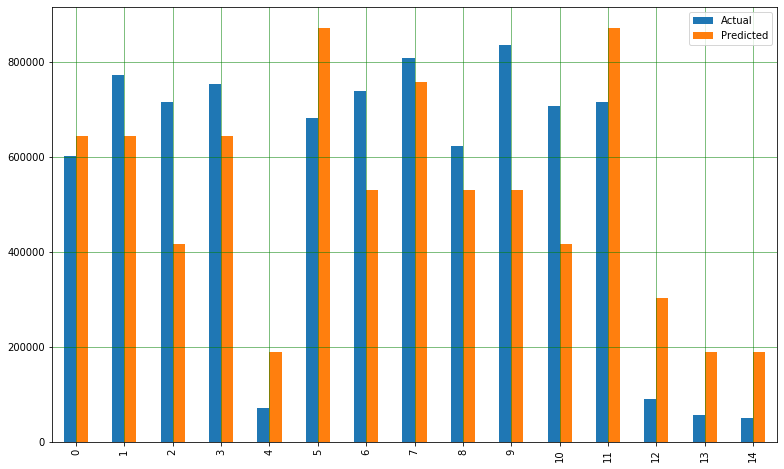

In [14]:
# Let's plot our results 


df1 = df.head(15)
df1.plot(kind='bar',figsize=(13,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Even though the model may lack precision, it is a good predictor of more busy days (Weekdays) vs. less busy days (Weekends). Would we get a more precise model using a full year and removing the outliers? We will look at this in part 2.